# Top-level summary of the study results:

** Based on the box plots of the final tumor volumes, the effectiveness of Capomulin seems to be comparable to Ramicane, i while it is significantly more effective than Infubinol and Ceftamine.

** Based on the pie charts, the gender distribution of male and female mice in this study was nearly even (51% male, 49% female)

** There is only one outlier amount the data group, this shows the data set is more consistant and the study is reliable. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np


In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [32]:
combined_data_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [42]:
# Checking the number of mice.

mice_count = combined_data_df['Mouse ID'].nunique()
print(mice_count)

249


In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = len(clean_data_df['Mouse ID'].value_counts())
clean_total_mice

248

# Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_drug_df = clean_data_df.groupby(['Drug Regimen'])
grouped_drug_df.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
11,g107,0,45.000000,0,Ketapril,Female,2,29
12,g107,5,48.791665,0,Ketapril,Female,2,29
13,g107,10,53.435987,0,Ketapril,Female,2,29
14,g107,15,58.135545,0,Ketapril,Female,2,29


In [52]:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = grouped_drug_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_drug_df['Tumor Volume (mm3)'].median()
tumor_variance = grouped_drug_df['Tumor Volume (mm3)'].var()
tumor_stdev = grouped_drug_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_drug_df['Tumor Volume (mm3)'].sem()

summary_grouped_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 'Median Tumor Volume': tumor_median, 'Tumor Volume Variance': tumor_variance,
                                   'Tumor Volume Std. Dev.': tumor_stdev, 'Tumor Volume Std. Err.': tumor_sem})

# Assemble the resulting series into a single summary DataFrame.
summary_grouped_df.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


summary_statistics_df = grouped_drug_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics_df.head(10)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pir Charts

Text(0, 0.5, 'Number of Mice Tested')

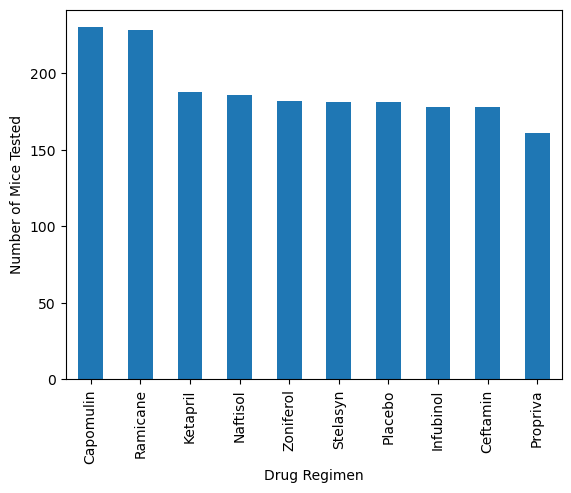

In [75]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Plot a bar chart (.plot.bar()) based on the amount of data points (.value_counts())
# for each treatment regimen (data_df['Drug Regimen'])
bar_plot = combined_data_df['Drug Regimen'].value_counts().plot.bar(width=0.5)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")


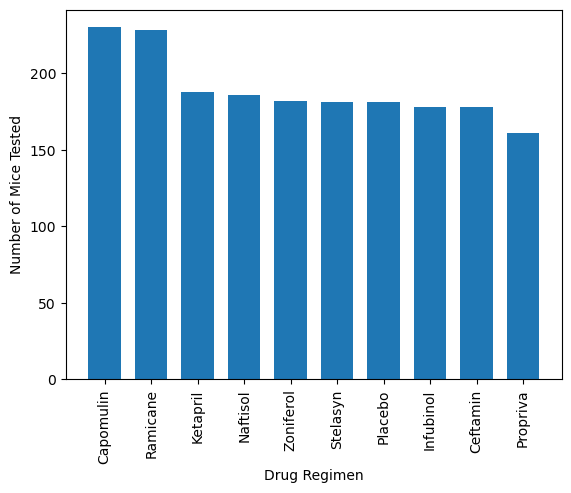

In [78]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Calculate the amount of data points for each drug regimen
counts = combined_data_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.7)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Display resulting plot
plt.show()

Text(0, 0.5, 'Sex')

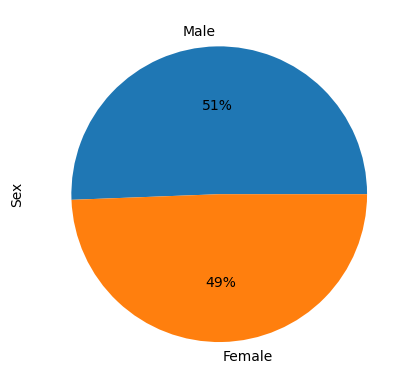

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify distribution of data by sex
data = combined_data_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed 
pie_plot = data.plot.pie(autopct="%1.0f%%", startangle=0)

pie_plot.set_ylabel('Sex')

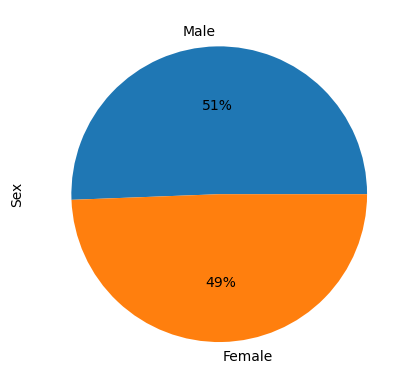

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Identify distribution of data by sex
data = combined_data_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.0f%%", startangle=0)
plt.ylabel('Sex')

# Display resulting plot
plt.show()

# Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

by_mouse = clean_data_df.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(clean_data_df,on=['Mouse ID','Timepoint'],how="left")


# Put treatments into a list for for loop (and later for plot labels)

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    
    # Determine outliers using upper and lower bounds
    
def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    return regimen_data
    
capomulin = get_outliers("Capomulin")
ramicane = get_outliers("Ramicane")
infubinol = get_outliers("Infubinol")
ceftamin = get_outliers("Ceftamin")

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


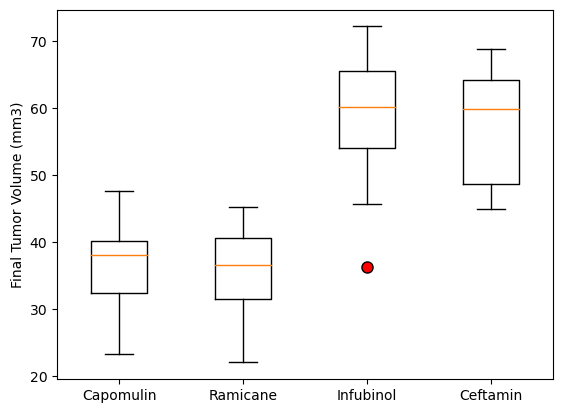

In [145]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot([capomulin, ramicane, infubinol, ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=flierprops )
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

# Line and Scatter Plots

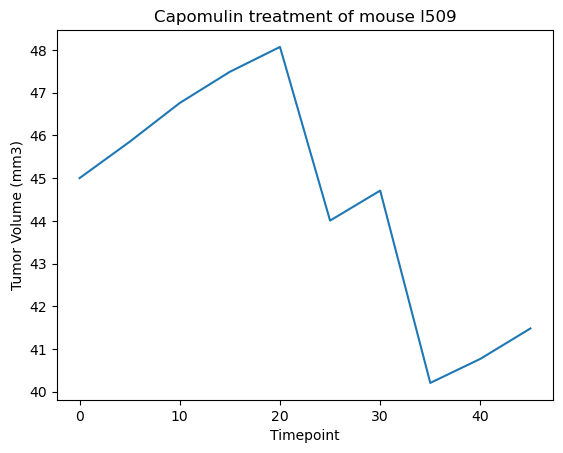

In [147]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

def get_line_plot(regimen, mouse_id):
    regimen_data = clean_data_df.loc[clean_data_df["Drug Regimen"] == regimen]
    data_by_id = regimen_data.loc[regimen_data['Mouse ID'] == mouse_id]
    plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(regimen + " treatment of mouse " + mouse_id)
    plt.show()
    
get_line_plot("Capomulin", "l509")

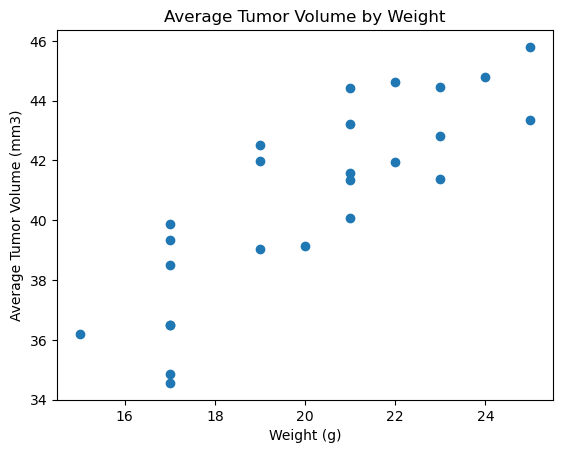

In [151]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


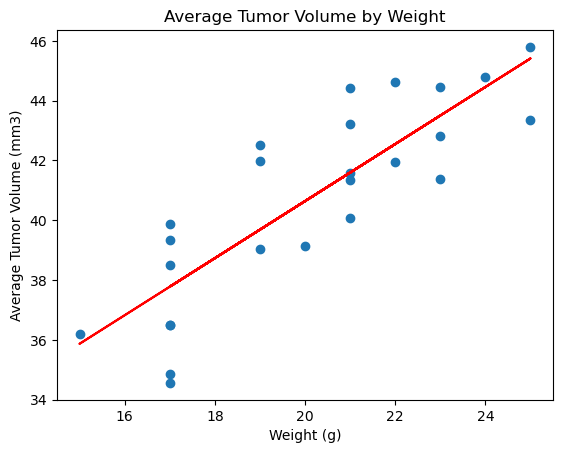

In [154]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Duplicate code for scatter plot from above:

capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept


# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()